In [37]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load "/Users/haleighwright/Desktop/NCEAS/pyriv/notebooks/nb_config.py"
import sys
sys.path.append("/Users/haleighwright/Desktop/NCEAS/pyriv")
sys.path.append("/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages")
import networkx as nx
import numpy as np
import sys
import geopandas as gpd
import seaborn # makes matplotlib graphs look prettier
from shapely.geometry import Point
from multiprocessing import Pool

from pyriv import graph_prep as GraphBuilder
from pyriv import river_graph as RiverGraph
from pyriv import snapping_processor as SnapTool

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # makes matplotlib graphs 2x resolution for retina display

In [3]:
from pyriv import point_processor as PointProcessor

In [4]:
import pylab as plt

In [5]:
import collections

In [3]:
%pwd

u'/Users/haleighwright/Desktop/NCEAS/pyriv/notebooks/dev/Experimental'

In [5]:
#ak = GraphBuilder.read_from_file('../../../../Data/sasap/NatMapCoastline3338/NatMapGDF/NatMapGDF.shp')

In [6]:
%%time
ak = GraphBuilder.read_from_file('ak.gpickle')

Weighting Edges with Distances
CPU times: user 1min 6s, sys: 6.97 s, total: 1min 13s
Wall time: 1min 14s


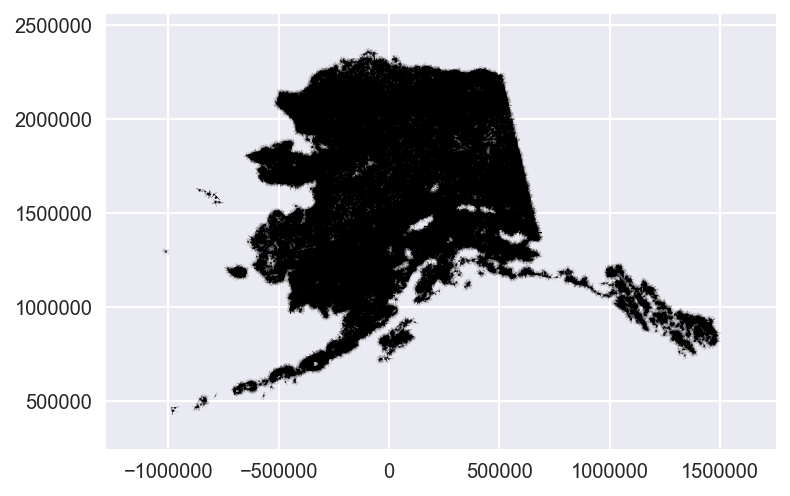

In [4]:
ak.plot()

In [21]:
in_degrees = ak.in_degree() # dictionary node:degree
in_values = sorted(set(in_degrees.values()))
in_hist = [in_degrees.values().count(x) for x in in_values]

In [22]:
out_degrees = ak.out_degree() # dictionary node:degree
out_values = sorted(set(out_degrees.values()))
out_hist = [out_degrees.values().count(x) for x in out_values]

In [23]:
plt.figure()
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bv-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Alaskan River Network')
plt.savefig('ak_degree_distribution.pdf')
plt.close()

In [30]:
print out_values
print out_hist

[0, 1, 2]
[2262, 415776, 82]


In [32]:
print in_values
print in_hist

[0, 1, 2, 3]
[16465, 387374, 14277, 4]


In [16]:
print ak.copy

<bound method RiverGraph.copy of <pyriv.river_graph.RiverGraph object at 0x10a8aefd0>>


In [11]:
graph_copy = ak.copy()
print len(graph_copy.edges())

415940


In [14]:
print len(ak.nodes())

418120


In [12]:
%%time
allnodes_missingedges = SnapTool.missing_edges_list(ak, 0.75, 'ak_highres_snapped.shp')

<class 'pyriv.river_graph.RiverGraph'>
CPU times: user 1min 19s, sys: 22.7 s, total: 1min 41s
Wall time: 10min 45s


In [26]:
print allnodes_missingedges[1]
print allnodes_missingedges[0][199060]
print allnodes_missingedges[0][268660]
pts = {1:allnodes_missingedges[0][199060],2:allnodes_missingedges[0][268660]}

[[199060, 268660], [268660, 199060]]
(-682747.8977132862, 542724.0259980412)
(-682747.9017629927, 542724.0249572785)


In [27]:
pts.values()

[(-682747.8977132862, 542724.0259980412),
 (-682747.9017629927, 542724.0249572785)]

In [28]:
SnapTool.missing_edges_to_shp(pts, 'missing_pts.shp', 'epsg:3338')

In [13]:
%%time
SnapTool.add_missing_edges(graph_copy, allnodes_missingedges[1], allnodes_missingedges[0])

CPU times: user 190 µs, sys: 3.45 ms, total: 3.64 ms
Wall time: 46.6 ms


In [16]:
print len(graph_copy.edges())

415942


In [39]:
%pwd

u'/Users/haleighwright/Desktop/NCEAS/pyriv/notebooks/dev/Experimental'

In [9]:
print len(ak.edges())
print type(ak_snapped)
print len(ak_snapped.edges())

415940
<type 'NoneType'>


AttributeError: 'NoneType' object has no attribute 'edges'

In [6]:
test = GraphBuilder.read_from_file('../../../tests/testdata/test.gpickle')

Weighting Edges with Distances


In [7]:
test_copy = test.copy()

In [8]:
print type(test_copy)

<class 'pyriv.river_graph.RiverGraph'>


In [9]:
%%time
allnodes_missingedges = SnapTool.missing_edges_list(test_copy, 0.75,'poop.shp')

<class 'pyriv.river_graph.RiverGraph'>
CPU times: user 20.2 ms, sys: 106 ms, total: 126 ms
Wall time: 254 ms


In [10]:
allnodes_missingedges

({0: (-335902.9307116249, 1126635.700335683),
  1: (-335296.10864771187, 1125076.8999078558),
  2: (-335850.5894843675, 1126651.7326361765)},
 [])

# want to turn the river network into its network representation (based on its actual branches)
maybe later will add the functionality to create a network like this defined by something else (i.e., an attribute of the river segment instead of physical branches)

1) Produce undirected version of entire graph

2) Find subgraphs (from undirected graph) and save their edges out

3) Reverse the original graph and save all the edges out

4) Main algorithm:
    - Go through each edge. Check if it has only 1 outgoing and 1 incoming (from original & reversed edgelists)
    - Merge edge appropriately if necessary
    - Continue until all edges (incoming + outgoing edges) > 2  

In [48]:
#entire graph: ak
#undirected graph: ak_undirected
#subgraph lists: ak_subgraphs
#reversed graph: ak_reversed


In [50]:
edges_ak_reversed = edgelist_to_edgedict(ak_reversed.edges())

In [ ]:
def process_edges(g, edges, r_edges):
    for fromnode, tolist in edges:
        
        if len(fromlist) == 1: # only has one "to" link
            if fromnode in r_edges: # means that it only has 
        
        
    

In [93]:
#trying a different approach for a second... (without recursion)

for subgraph in ak_subgraphs:
    rg_subgraph = RiverGraph.RiverGraph(None, subgraph)
    edges = edgelist_to_edgedict(rg_subgraph.edges())
    river_mouths = rg_subgraph.river_mouths
    inland_deadends = rg_subgraph.inland_deadends
    #print "so far so good"
    
    #while edges: #while edges are not empty
    process_edges(rg_subgraph, edges, river_mouths, inland_deadends)
            
            

so far so good
so far so good
so far so good
so far so good


NetworkXError: Input is not a correct NetworkX graph.

In [36]:
raw_edges = ak.edges()

In [9]:
ak_undirected = ak.to_undirected()

In [10]:
print len(ak_undirected.nodes())
print len(ak_undirected.edges())

418120
415940


##### how to wrap a graph in RiverGraph object 
(Q: why do we need to put "none" for coastline shapefile if it is already defaulted to none?)

In [11]:
wrapper_ak = RiverGraph.RiverGraph(None, ak_undirected) 
#how to wrap a graph in RiverGraph object (Q: why do we need to put "none" for coastline shapefile if it is 
#already defaulted to none?)

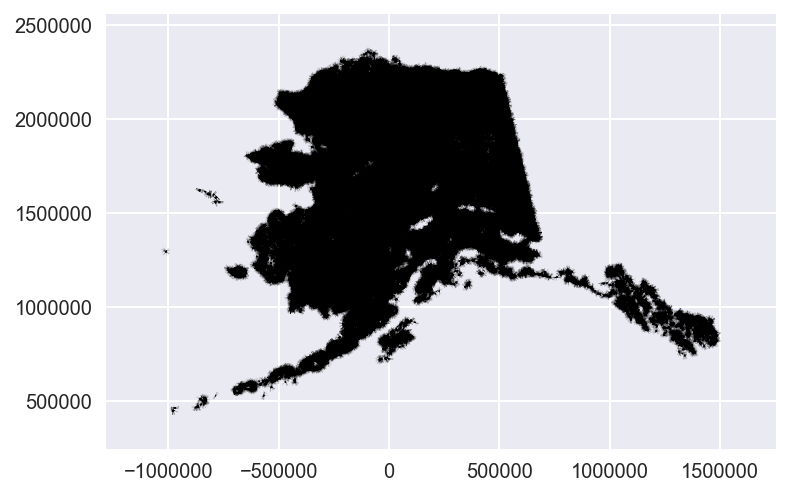

In [14]:
wrapper_ak.plot()

## 2)

In [12]:
ak_subgraphs = list(nx.connected_component_subgraphs(ak_undirected))

In [13]:
len(ak_subgraphs)

2213

In [14]:
subgraph_nodes = {}
subgraph_edges = {}

In [15]:

subgraph_nodes = {}
subgraph_edges = {}

for subgraph in ak_subgraphs:
    n = len(subgraph.nodes())
    e = len(subgraph.edges())
    subgraph_edges[e] = subgraph_edges.get(e, 0) + 1
    subgraph_nodes[n] = subgraph_nodes.get(n, 0) + 1
    
    #if e in subgraph_edges == True:
    #    subgraph_edges[e]= subgraph_edges[e]+1
    #    print e
    #else:
    #    subgraph_edges[e] = 1
    #if n in subgraph_nodes == True:
    #    subgraph_nodes[n] = subgraph_nodes[n]+1
    #    print n
    #else:
    #    subgraph_nodes[n] = 1



In [16]:
print len(subgraph_edges.keys())
print len(subgraph_nodes.keys())

313
313


In [17]:
ordered_edges = collections.OrderedDict(sorted(subgraph_edges.items()))

In [18]:
ordered_nodes = collections.OrderedDict(sorted(subgraph_nodes.items()))

In [19]:
keys = ordered_edges.keys()
plt.figure()
y_pos = np.arange(len(keys))
num_subgraphs = ordered_edges.values()
plt.barh(y_pos, num_subgraphs, align='center', alpha=0.5)
plt.yticks(y_pos, num_subgraphs)
plt.xlabel("number of edges")
plt.ylabel('number of subgraphs')
plt.savefig('number_of_edges_subgraphs.pdf')
plt.close()

In [20]:
##TODO:
# for each subgraph chose a starting point and span from that point, 
#   adding corrected edges to large graph (all of alaska)
#   **must check directionality from original (directed) graph before merging edge to determine 
#                                   resultant directionality (and assure correctness)

In [21]:
# out edges - tuples
# if the len(return list) > 1, there is a split at that node
len(ak_subgraphs[0].edges((234865.80808218906, 1490875.1474706773)))

1

In [22]:
new_graph = RiverGraph.RiverGraph()

In [ ]:
# edges keyed by subgraph i.e. dict of subgraphs [edges] (reduces search space) (this is ak_subgraphs[x].edges())


for subgraph in ak_subgraph:
    edges = subgraph.edges()
    for edgetuples in edges:
        l = len(edgetuples)
        if l > 1: #this means there is a split in the river network; may not need this check? 
            process_split(egdetuples, edges, l)
            


In [23]:
type(ak_subgraphs[0])
temp = RiverGraph.RiverGraph(None, ak_subgraphs[0]) 

In [24]:
def edgelist_to_edgedict(edgelist, directed=True):
    """Convert a list of edges into a dict of edges.
    
    Parameters
    ----------
    edgelist: list[array-like(Tuple(Float,Float), Tuple(Float,Float))]
        List of edges to turn into a dictionary.
    directed: Boolean{True, False}
        True if its a list from a directed graph, false elsewise.
        
    Returns
    -------
    edgedict : Dict{Tuple(Float,Float): array-like[Tuple(Float,Float), ...]}
        A dictionary mapping a FROM edge (in the directed case)
        to its direct neighboring TO edges, that are contained in a list.
        
    Note
    ----
    Undirected version is not yet implemented.
    
    """
    edgedict = {}
    for edge in edgelist:
        fromnode = edge[0]
        tonode = edge[1]
        
        if fromnode not in edgedict:
            edgedict[fromnode] = []
        
        edgedict[fromnode].append(tonode)
    return edgedict


In [25]:
ltemp = temp.edges()
ldict = edgelist_to_edgedict(ltemp)

In [165]:
print ldict

{(234865.80808218906, 1490875.1474706773): [(233882.75065432975, 1489518.618836762)], (105932.92909613095, 1391533.2414982314): [(105355.17484762392, 1391359.5711814945), (105938.91988474928, 1391543.680492546)], (93284.96124001499, 1317198.2247820965): [(93877.32683515533, 1317256.1366833427), (92599.31289774693, 1316843.7787413646)], (207438.84766968846, 1378021.8634712996): [(208590.66880726113, 1379488.9307179211), (207518.26821372952, 1377936.378285227)], (208445.0124787432, 1345017.2300058282): [(208469.73387368605, 1345099.5027430744), (208475.16049548314, 1345009.4624470514)], (102952.29032520032, 1364671.7193953446): [(103498.7269632749, 1364471.6033694067)], (364313.32222630753, 1437042.2545806158): [(364224.1773728748, 1436846.345431103), (364241.9388595476, 1437044.6439352306)], (63902.29440890105, 1276381.8794885073): [(63828.8853444833, 1276450.0276202704), (64270.43874190097, 1276433.6843599416)], (97821.24752020204, 1390492.639586015): [(97457.14078043192, 1393271.53540

In [51]:
print r_ldict[(105932.92909613095, 1391533.2414982314)]

[(105355.17484762392, 1391359.5711814945), (105938.91988474928, 1391543.680492546)]


In [35]:
print r_ldict

{(234865.80808218906, 1490875.1474706773): [(233882.75065432975, 1489518.618836762)], (105932.92909613095, 1391533.2414982314): [(105355.17484762392, 1391359.5711814945), (105938.91988474928, 1391543.680492546)], (93284.96124001499, 1317198.2247820965): [(93877.32683515533, 1317256.1366833427), (92599.31289774693, 1316843.7787413646)], (207438.84766968846, 1378021.8634712996): [(208590.66880726113, 1379488.9307179211), (207518.26821372952, 1377936.378285227)], (208445.0124787432, 1345017.2300058282): [(208469.73387368605, 1345099.5027430744), (208475.16049548314, 1345009.4624470514)], (102952.29032520032, 1364671.7193953446): [(103498.7269632749, 1364471.6033694067)], (364313.32222630753, 1437042.2545806158): [(364224.1773728748, 1436846.345431103), (364241.9388595476, 1437044.6439352306)], (63902.29440890105, 1276381.8794885073): [(63828.8853444833, 1276450.0276202704), (64270.43874190097, 1276433.6843599416)], (97821.24752020204, 1390492.639586015): [(97457.14078043192, 1393271.53540

In [ ]:
def process_split(edgetuples, all_edges, num_edges):
    if num_edges > 1: #this means there is a split in the river network
        for edge in edgetuples:
            process_split()
    else if num_edges == 1: #
        
        

In [31]:
reverse_ak_subgraphs0 = temp.reverse()

In [33]:
r_ldict = edgelist_to_edgedict(reverse_ak_subgraphs0.edges())

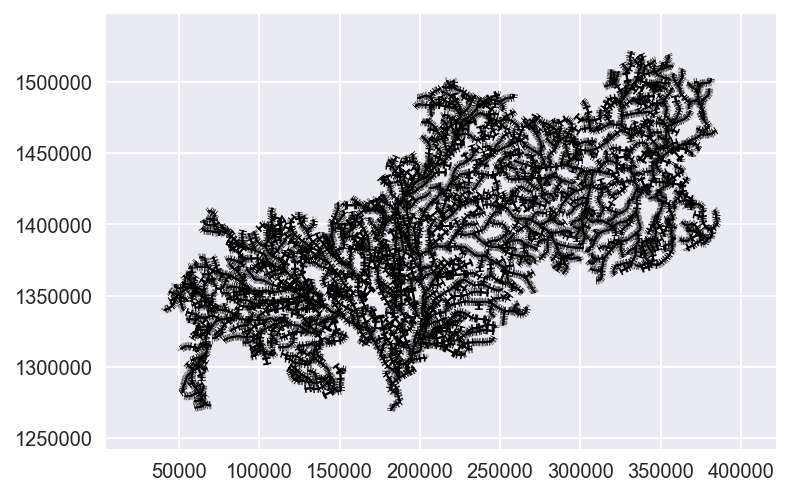

In [32]:
reverse_ak_subgraphs0.plot()

In [27]:
new_graph = RiverGraph.RiverGraph()

In [52]:
tn = (105932.92909613095, 1391533.2414982314)
print r_ldict[tn]
print ldict[tn]

[(105355.17484762392, 1391359.5711814945), (105938.91988474928, 1391543.680492546)]
[(105355.17484762392, 1391359.5711814945), (105938.91988474928, 1391543.680492546)]
